In [60]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.6/172.6 kB 5.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/xaviersavarimuthu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/xaviersavarimuthu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [182]:
dataset=pd.read_csv('BBC News Train.csv')
dataset['Text'][2]

'bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world service poll believe the world economy is worsening.  most respondents also said their national economy was getting worse. but when asked about their own family s financial outlook  a majority in 14 countries said they were positive about the future. almost 23 000 people in 22 countries were questioned for the poll  which was mostly conducted before the asian tsunami disaster. the poll found that a majority or plurality of people in 13 countries believed the economy was going downhill  compared with respondents in nine countries who believed it was improving. those surveyed in three countries were split. in percentage terms  an average of 44% of respondents in each country said the world economy was getting worse  compared to 34% who said it was improving. similarly  48% were pessimistic about their national economy  while 41% were optimistic. and 47% saw their family s economic conditions impr

In [129]:
dataset['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [130]:
dataset['Category_id']=dataset['Category'].factorize()[0]
dataset.head()

,ArticleId,Text,Category,Category_id
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


In [131]:
category = dataset[['Category', 'Category_id']].drop_duplicates().sort_values('Category_id')
category

,Category,Category_id
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


In [132]:
business = dataset[dataset['Category_id'] == 0 ]

In [133]:
business['Category_id'].count()

336

In [134]:
tech=dataset[dataset['Category_id']==1]

In [135]:
tech['Category_id'].count()

261

In [136]:
politics=dataset[dataset['Category_id']==2]
politics['Category_id'].count()

274

In [137]:
sports=dataset[dataset['Category_id']==3]
sports['Category_id'].count()

346

In [138]:
entertainment=dataset[dataset['Category_id']==4]
entertainment['Category_id'].count()

273

In [139]:
count=[business['Category_id'].count(),tech['Category_id'].count(),politics['Category_id'].count(),
      sports['Category_id'].count(),entertainment['Category_id'].count()]

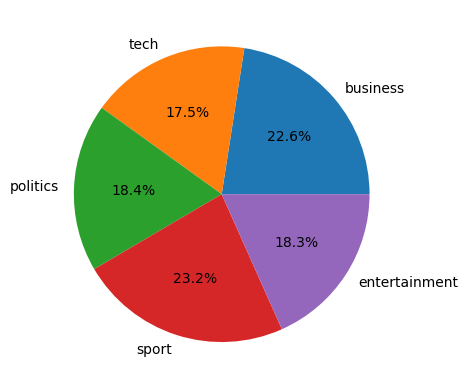

In [140]:
piechart = plt.pie(count, labels = ['business', 'tech', 'politics', 'sport', 'entertainment'],
              autopct = "%1.1f%%")

In [141]:
category=category['Category']


In [142]:
count=[business['Category_id'].count(),tech['Category_id'].count(),politics['Category_id'].count(),
      sports['Category_id'].count(),entertainment['Category_id'].count()]

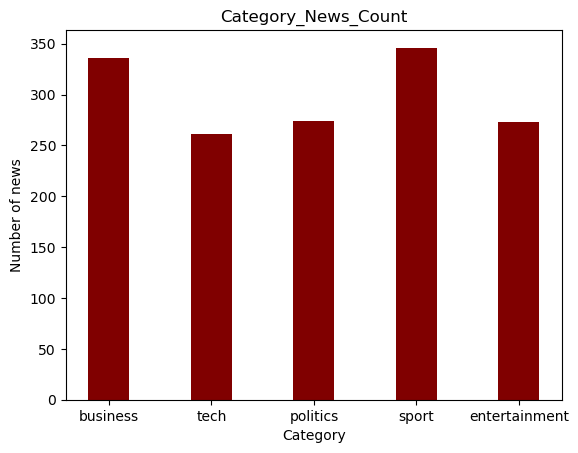

In [143]:
plt.bar(category, count, color ='maroon',
        width = 0.4)
plt.title("Category_News_Count")
     
# giving X and Y labels
plt.xlabel("Category")
plt.ylabel("Number of news")
plt.show()
     

In [144]:
stopwords = set(stopwords.words('english'))

business = dataset[dataset['Category_id'] == 0]
business

,ArticleId,Text,Category,Category_id
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
4,917,enron bosses in $168m payout eighteen former e...,business,0
8,2034,car giant hit by mercedes slump a slump in pro...,business,0
...,...,...,...,...
1474,1257,indy buys into india paper irish publishing gr...,business,0
1479,2058,high fuel costs hit us airlines two of the lar...,business,0
1480,1124,qantas sees profits fly to record australian a...,business,0
1484,1774,hyundai to build new india plant south korea s...,business,0


In [145]:
business = business['Text']


In [146]:
tech = dataset[dataset['Category_id'] == 1]

tech = tech['Text']

politics = dataset[dataset['Category_id'] == 2]

politics = politics['Text']

sport = dataset[dataset['Category_id'] == 3]

sport = sport['Text']

entertainment = dataset[dataset['Category_id'] == 4]

entertainment = entertainment['Text']

business related words:


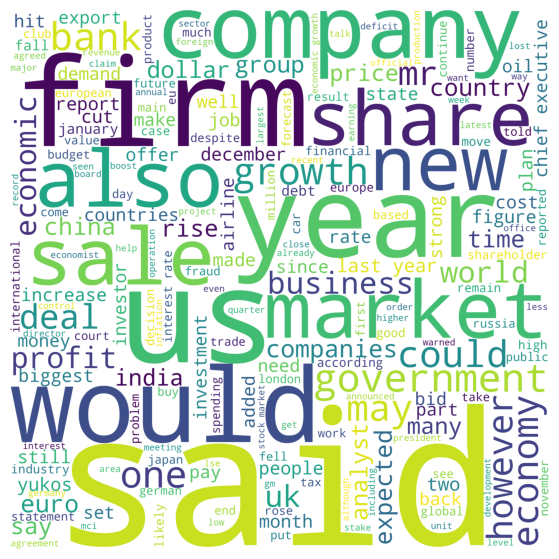

tech related words:


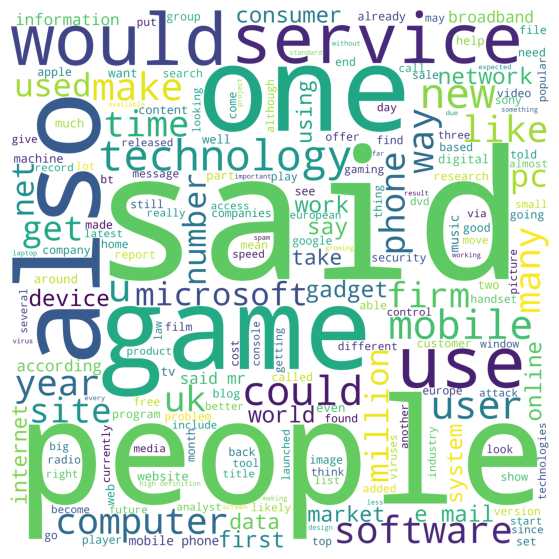

politics related words:


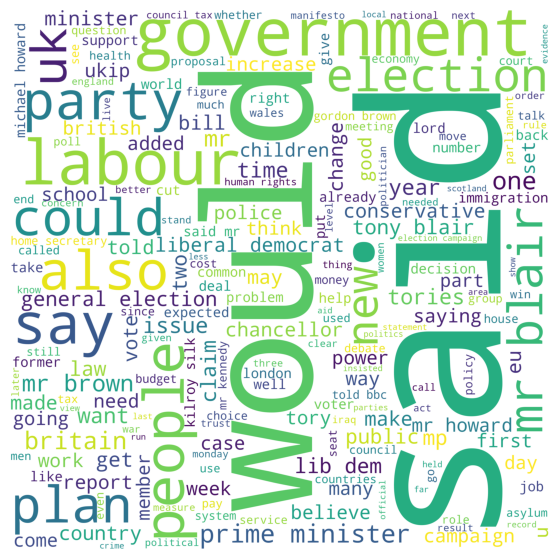

sport related words:


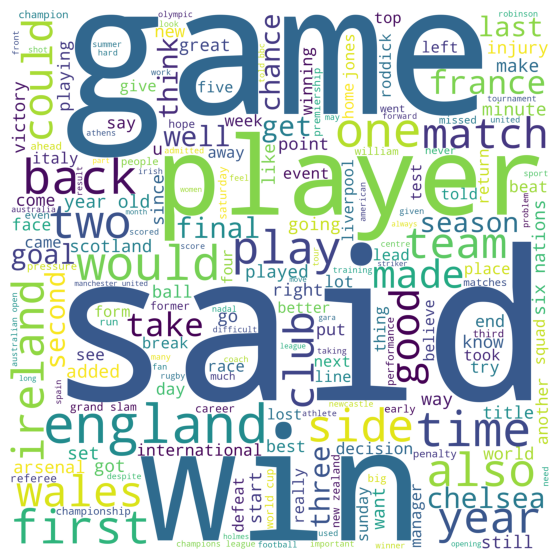

entertainment related words:


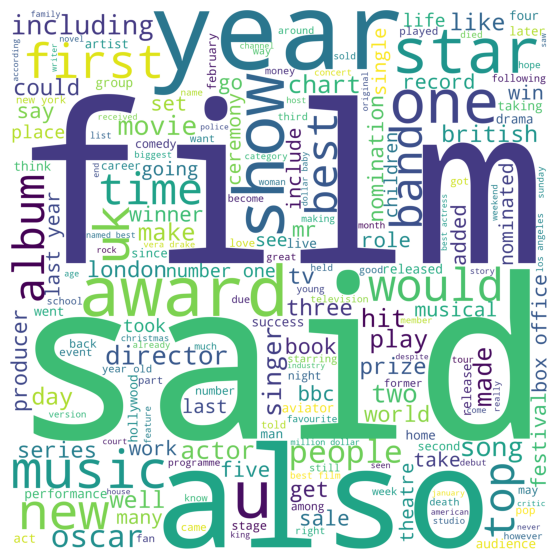

In [119]:
from wordcloud import WordCloud
def wordcloud_draw(dataset, color):
    words = ' '.join(dataset)
    cleaned_word = ' '.join([word for word in words.split() if (word != 'news' and word != 'text')])
    wordcloud = WordCloud(stopwords = stopwords,background_color = color,width = 2500, height = 2500).generate(cleaned_word)

    plt.figure(1, figsize = (10,7))

    plt.imshow(wordcloud)

    plt.axis("off")

    plt.show()
print("business related words:")

wordcloud_draw(business, 'white')

print("tech related words:")

wordcloud_draw(tech, 'white')

print("politics related words:")

wordcloud_draw(politics, 'white')

print("sport related words:")

wordcloud_draw(sport, 'white')

print("entertainment related words:")

wordcloud_draw(entertainment, 'white')

In [156]:
dataset['Text']=dataset['Text'].str.lower()

In [157]:
def text_cleaning(text):
    text = re.sub(r'[^a-zA-Z0-9\']', ' ', text)
    text = text.split()
    text = ' '.join(text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))  # Set of English stopwords
    tokens = [i for i in tokens if i not in stop_words]
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(i) for i in tokens]
    
    cleaned_text = " ".join(tokens)
    return cleaned_text

In [158]:
dataset['cleaned_Text'] = dataset['Text'].apply(text_cleaning)

In [159]:
dataset['cleaned_Text']

0       worldcom ex bos launch defence lawyer defendin...
1       german business confidence slide german busine...
2       bbc poll indicates economic gloom citizen majo...
3       lifestyle governs mobile choice faster better ...
4       enron boss 168m payout eighteen former enron d...
                              ...                        
1485    double eviction big brother model caprice holb...
1486    dj double act revamp chart show dj duo jk joel...
1487    weak dollar hit reuters revenue medium group r...
1488    apple ipod family expands market apple expande...
1489    santy worm make unwelcome visit thousand websi...
Name: cleaned_Text, Length: 1490, dtype: object

In [160]:
dataset.columns

Index(['ArticleId', 'Text', 'Category', 'Category_id', 'cleaned_Text'], dtype='object')

In [162]:
dataset

,ArticleId,Text,Category,Category_id,cleaned_Text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0,worldcom ex bos launch defence lawyer defendin...
1,154,german business confidence slides german busin...,business,0,german business confidence slide german busine...
2,1101,bbc poll indicates economic gloom citizens in ...,business,0,bbc poll indicates economic gloom citizen majo...
3,1976,lifestyle governs mobile choice faster bett...,tech,1,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,0,enron boss 168m payout eighteen former enron d...
...,...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,4,double eviction big brother model caprice holb...
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,4,dj double act revamp chart show dj duo jk joel...
1487,1590,weak dollar hits reuters revenues at media gro...,business,0,weak dollar hit reuters revenue medium group r...
1488,1587,apple ipod family expands market apple has exp...,tech,1,apple ipod family expands market apple expande...


In [161]:
x = dataset['cleaned_Text']
y = dataset['Category_id']


Training and Evaluating DecisionTreeClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        75
           1       0.90      0.76      0.82        58
           2       0.81      0.75      0.78        56
           3       0.95      0.95      0.95        63
           4       0.79      0.91      0.85        46

    accuracy                           0.86       298
   macro avg       0.86      0.85      0.85       298
weighted avg       0.86      0.86      0.85       298



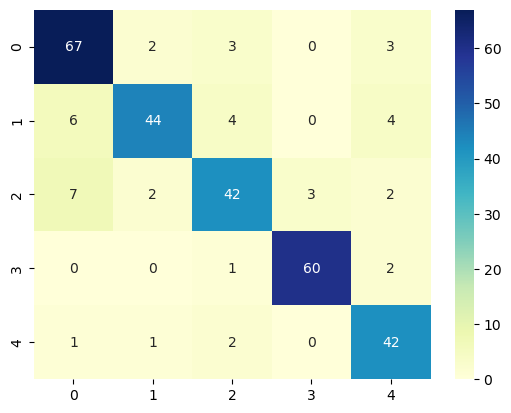

Training and Evaluating KNeighborsClassifier
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.53      0.70        75
           1       1.00      0.43      0.60        58
           2       0.88      0.79      0.83        56
           3       0.39      1.00      0.57        63
           4       0.74      0.37      0.49        46

    accuracy                           0.63       298
   macro avg       0.80      0.62      0.64       298
weighted avg       0.81      0.63      0.64       298



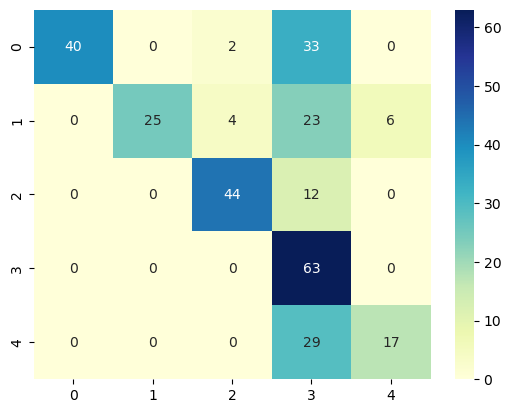

Training and Evaluating MultinomialNB
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.97      0.97      0.97        58
           2       0.95      0.96      0.96        56
           3       1.00      1.00      1.00        63
           4       1.00      0.98      0.99        46

    accuracy                           0.98       298
   macro avg       0.98      0.98      0.98       298
weighted avg       0.98      0.98      0.98       298



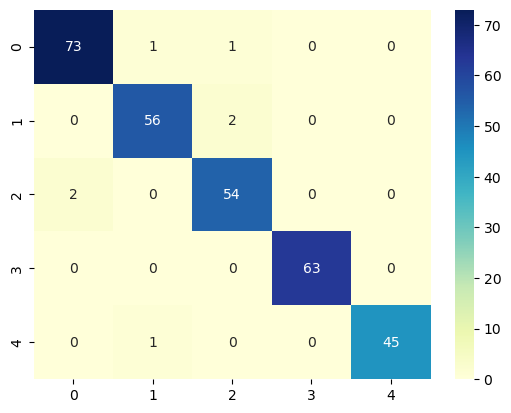

Training and Evaluating RandomForestClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        75
           1       0.98      0.91      0.95        58
           2       0.96      0.98      0.97        56
           3       0.95      1.00      0.98        63
           4       1.00      0.93      0.97        46

    accuracy                           0.96       298
   macro avg       0.97      0.96      0.96       298
weighted avg       0.96      0.96      0.96       298



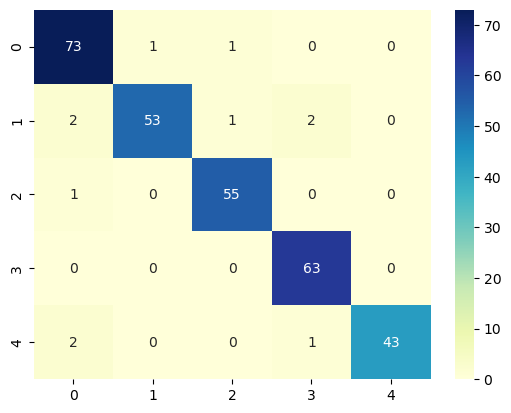

In [170]:
def train_evaluate_plot(classifier, x_train, x_test, y_train, y_test):
    classifier.fit(x_train, y_train)
    predictions = classifier.predict(x_test)
    
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    
    
    cm=confusion_matrix(y_test, predictions)
    cm_matrix = pd.DataFrame(data=cm, columns=['0','1','2','3','4'],
                        index=['0','1','2','3','4'])
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
    plt.show()
    


count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(dataset['cleaned_Text'])

# Split data into training and testing sets
x = count_matrix  # Features (Bag of Words representation)
y = dataset['Category_id']
  # Target variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# List of classifiers
classifiers = [DecisionTreeClassifier(), KNeighborsClassifier(), MultinomialNB(), RandomForestClassifier()]

# Train, Evaluate, and Plot results for each classifier
for classifier in classifiers:
    print("Training and Evaluating", classifier.__class__.__name__)
    train_evaluate_plot(classifier, x_train, x_test, y_train, y_test)

In [171]:
import pickle

In [172]:
model=RandomForestClassifier()

In [173]:
with open('Classifier.pkl', 'wb') as file:
    pickle.dump(model, file)


In [174]:
count_vectorizer = CountVectorizer()

In [175]:
with open('cv.pkl', 'wb') as file:
    pickle.dump(count_vectorizer, file)
